<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-pandas,-matplotlib,-and-the-matplotlib-dates-and-date-formatting-utilities" data-toc-modified-id="Import-pandas,-matplotlib,-and-the-matplotlib-dates-and-date-formatting-utilities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import pandas, matplotlib, and the matplotlib dates and date formatting utilities</a></span></li><li><span><a href="#View-a-couple-of-rows-of-the-Covid-daily-data" data-toc-modified-id="View-a-couple-of-rows-of-the-Covid-daily-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>View a couple of rows of the Covid daily data</a></span></li><li><span><a href="#Calculate-new-cases-and-deaths-by-day" data-toc-modified-id="Calculate-new-cases-and-deaths-by-day-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate new cases and deaths by day</a></span></li><li><span><a href="#Show-line-plots-for-new-cases-and-new-deaths-by-day" data-toc-modified-id="Show-line-plots-for-new-cases-and-new-deaths-by-day-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Show line plots for new cases and new deaths by day</a></span></li><li><span><a href="#Calculate-new-cases-and-deaths-by-day-and-region" data-toc-modified-id="Calculate-new-cases-and-deaths-by-day-and-region-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate new cases and deaths by day and region</a></span></li><li><span><a href="#Show-line-plots-of-new-cases-by-selected-regions" data-toc-modified-id="Show-line-plots-of-new-cases-by-selected-regions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Show line plots of new cases by selected regions</a></span></li><li><span><a href="#Use-a-stacked-plot-to-examine-the-uptick-in-Southern-Africa-more-closely" data-toc-modified-id="Use-a-stacked-plot-to-examine-the-uptick-in-Southern-Africa-more-closely-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Use a stacked plot to examine the uptick in Southern Africa more closely</a></span></li></ul></div>

# Import pandas, matplotlib, and the matplotlib dates and date formatting utilities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
# pd.set_option('display.width', 80)
# pd.set_option('display.max_columns', 20)
# pd.set_option('display.max_rows', 200)
# pd.options.display.float_format = '{:,.0f}'.format

In [3]:
import watermark
%load_ext watermark

%watermark -n -i -iv

pandas    : 1.2.1
json      : 2.0.9
watermark : 2.1.0
numpy     : 1.19.2
matplotlib: 3.3.2



In [4]:
coviddaily = pd.read_csv('data/coviddaily720.csv', parse_dates=['casedate'])

# View a couple of rows of the Covid daily data

In [5]:
coviddaily.sample(2, random_state=1).T

,2478,9526
iso_code,BRB,FRA
casedate,2020-06-11 00:00:00,2020-02-16 00:00:00
location,Barbados,France
continent,North America,Europe
new_cases,4.0,0.0
new_deaths,0.0,0.0
population,287371.0,65273512.0
pop_density,664.463,122.578
median_age,39.8,42.0
gdp_per_capita,16978.068,38605.671


# Calculate new cases and deaths by day

In [6]:
coviddailytotals = coviddaily.loc[coviddaily['casedate'].between(
    '2020-02-01',
    '2020-07-12')].groupby(['casedate'])[['new_cases',
                                          'new_deaths']].sum().reset_index()

In [7]:
coviddailytotals.sample(7, random_state=1)

,casedate,new_cases,new_deaths
44,2020-03-16,12386.0,757.0
47,2020-03-19,20130.0,961.0
94,2020-05-05,77474.0,3998.0
78,2020-04-19,80127.0,6005.0
160,2020-07-10,228608.0,5441.0
11,2020-02-12,2033.0,97.0
117,2020-05-28,102619.0,5168.0


# Show line plots for new cases and new deaths by day

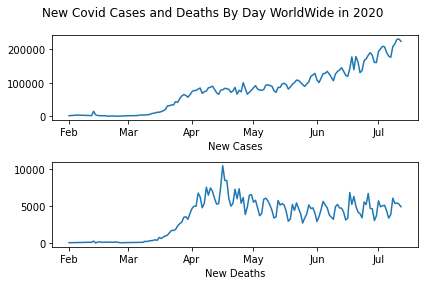

In [8]:
fig = plt.figure()
plt.suptitle('New Covid Cases and Deaths By Day WorldWide in 2020')
ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1st column
ax1.plot(coviddailytotals['casedate'], coviddailytotals['new_cases'])
# %b ---- Abbreviated month name (Jan, Feb, etc.).
ax1.xaxis.set_major_formatter(DateFormatter('%b'))
ax1.set_xlabel('New Cases')

ax2 = plt.subplot(2, 1, 2)  # 2 rows, 2nd column
ax2.plot(coviddailytotals['casedate'], coviddailytotals['new_deaths'])
# %b ---- Abbreviated month name (Jan, Feb, etc.).
ax2.xaxis.set_major_formatter(DateFormatter('%b'))
ax2.set_xlabel('New Deaths')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# Calculate new cases and deaths by day and region

In [9]:
regiontotals = coviddaily.loc[coviddaily['casedate'].between(
    '2020-02-01',
    '2020-07-12')].groupby(['casedate',
                            'region'])[['new_cases',
                                        'new_deaths']].sum().reset_index()

In [10]:
regiontotals.sample(7, random_state=1)

,casedate,region,new_cases,new_deaths
1518,2020-05-16,North Africa,634.0,28.0
2410,2020-07-11,Central Asia,3873.0,26.0
870,2020-04-05,Western Europe,30090.0,4079.0
1894,2020-06-08,Western Europe,3712.0,180.0
790,2020-03-31,Western Europe,30180.0,2970.0
2270,2020-07-02,North Africa,2006.0,89.0
306,2020-02-26,Oceania / Aus,0.0,0.0


# Show line plots of new cases by selected regions

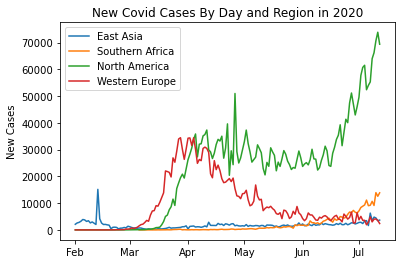

In [11]:
showregions = [
    'East Asia', 'Southern Africa', 'North America', 'Western Europe'
]

for j in range(len(showregions)):
    rt = regiontotals.loc[regiontotals['region'] == showregions[j],
                          ['casedate', 'new_cases']]
    plt.plot(rt['casedate'], rt['new_cases'], label=showregions[j])
plt.title('New Covid Cases By Day and Region in 2020')
# %b ---- Abbreviated month name (Jan, Feb, etc.).
plt.gca().get_xaxis().set_major_formatter(DateFormatter('%b'))
plt.ylabel('New Cases')
plt.legend()
plt.show()

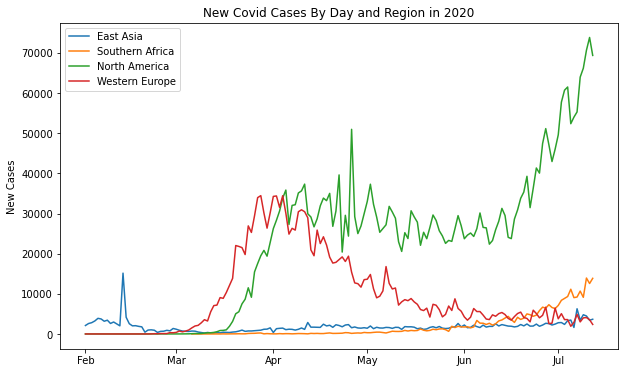

In [12]:
# Not using range(len(showregions))
showregions = [
    'East Asia', 'Southern Africa', 'North America', 'Western Europe'
]
plt.figure(figsize=(10, 6))
for reg in showregions:
    rt = regiontotals.loc[regiontotals['region'] == reg,
                          ['casedate', 'new_cases']]
    plt.plot(rt['casedate'], rt['new_cases'], label=reg)

plt.title('New Covid Cases By Day and Region in 2020')
# %b ---- Abbreviated month name (Jan, Feb, etc.).
plt.gca().get_xaxis().set_major_formatter(DateFormatter('%b'))
plt.ylabel('New Cases')
plt.legend()
plt.show()

# Use a stacked plot to examine the uptick in Southern Africa more closely

In [13]:
af = regiontotals.loc[regiontotals['region'] == 'Southern Africa',
                      ['casedate', 'new_cases']].rename(
                          columns={'new_cases': 'afcases'})

In [14]:
af.shape

(127, 2)

In [15]:
af.tail(2)

,casedate,afcases
2419,2020-07-11,12565.0
2435,2020-07-12,13857.0


In [16]:
sa = coviddaily.loc[coviddaily['location'] == 'South Africa',
                    ['casedate', 'new_cases']].rename(
                        columns={'new_cases': 'sacases'})

In [17]:
sa.shape

(127, 2)

In [18]:
sa.tail(2)

,casedate,sacases
24407,2020-07-11,12348.0
24408,2020-07-12,13497.0


In [19]:
af_all = pd.merge(af,
                  sa,
                  left_on=['casedate'],
                  right_on=['casedate'],
                  how='left')

In [20]:
af_all['sacases'].fillna(0, inplace=True)

In [22]:
af_all['afcases_nosa'] = af_all['afcases'] - af_all['sacases']

In [23]:
af_all.shape

(127, 4)

In [24]:
af_all.tail(2)

,casedate,afcases,sacases,afcases_nosa
125,2020-07-11,12565.0,12348.0,217.0
126,2020-07-12,13857.0,13497.0,360.0


In [26]:
afabb = af_all.loc[af_all['casedate'].between('2020-04-01', '2020-07-12')]

In [27]:
afabb.shape

(103, 4)

In [28]:
afabb.tail(2)

,casedate,afcases,sacases,afcases_nosa
125,2020-07-11,12565.0,12348.0,217.0
126,2020-07-12,13857.0,13497.0,360.0


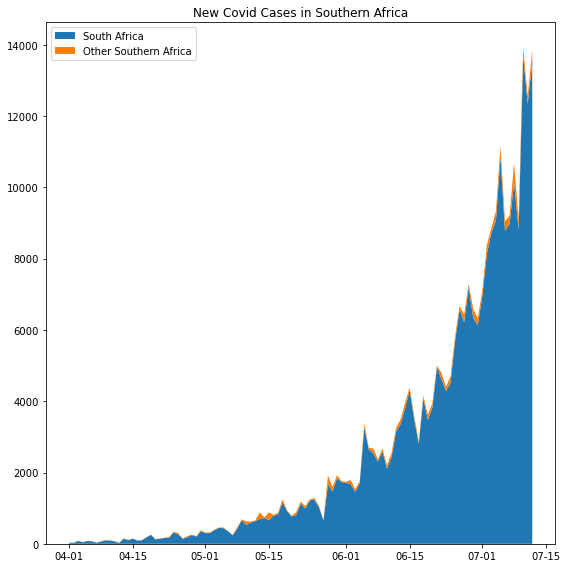

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
ax.stackplot(afabb['casedate'],
             afabb['sacases'],
             afabb['afcases_nosa'],
             labels=['South Africa', 'Other Southern Africa'])
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
plt.title('New Covid Cases in Southern Africa')
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

**Not seeing same result as shown in book even with the exact code as in book / github**

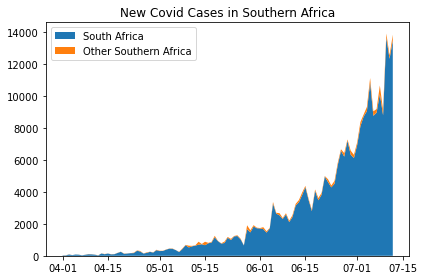

In [30]:
af = regiontotals.loc[regiontotals.region == 'Southern Africa',
                      ['casedate', 'new_cases']].rename(
                          columns={'new_cases': 'afcases'})
sa = coviddaily.loc[coviddaily.location == 'South Africa',
                    ['casedate', 'new_cases']].rename(
                        columns={'new_cases': 'sacases'})
af = pd.merge(af, sa, left_on=['casedate'], right_on=['casedate'], how="left")
af.sacases.fillna(0, inplace=True)
af['afcasesnosa'] = af.afcases - af.sacases
afabb = af.loc[af.casedate.between('2020-04-01', '2020-07-12')]

fig = plt.figure()
ax = plt.subplot()
ax.stackplot(afabb.casedate,
             afabb.sacases,
             afabb.afcasesnosa,
             labels=['South Africa', 'Other Southern Africa'])
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New Covid Cases in Southern Africa")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()